In [3]:
# CELL 1: Import Libraries
# ============================================================
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [4]:
# CELL 2: Load Data
# ============================================================
data_path = "C:/Users/sonu/resume-screening-ai/data/processed/parsed_resumes.json"

with open(data_path, 'r', encoding='utf-8') as f:
    resumes = json.load(f)

print(f"✓ Loaded {len(resumes)} resumes")
print(f"Keys in each resume: {list(resumes[0].keys())}")

✓ Loaded 2483 resumes
Keys in each resume: ['id', 'filename', 'category', 'parsed_at', 'cleaned_text', 'email', 'phone', 'skills', 'text_length', 'word_count']


In [5]:
# CELL 3: Create DataFrame
# ============================================================
df = pd.DataFrame(resumes)

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst 3 rows:")
df.head(3)

DATASET OVERVIEW
Shape: (2483, 10)
Columns: ['id', 'filename', 'category', 'parsed_at', 'cleaned_text', 'email', 'phone', 'skills', 'text_length', 'word_count']

First 3 rows:


,id,filename,category,parsed_at,cleaned_text,email,phone,skills,text_length,word_count
0,10554236,10554236.pdf,ACCOUNTANT,2025-12-24T12:09:53.126569,ACCOUNTANT Summary Financial Accountant specia...,None,None,"[aws, excel]",24153,3469
1,10674770,10674770.pdf,ACCOUNTANT,2025-12-24T12:09:53.328053,STAFF ACCOUNTANT Summary Highly analytical and...,None,None,[excel],7488,1047
2,11163645,11163645.pdf,ACCOUNTANT,2025-12-24T12:09:53.460876,ACCOUNTANT Professional Summary To obtain a po...,None,864-472-7092,[excel],4742,628


In [6]:
# CELL 4: Basic Statistics
# ============================================================
print("="*60)
print("BASIC STATISTICS")
print("="*60)

print(f"\n📊 Resume Metrics:")
print(f"  Total resumes: {len(df):,}")
print(f"  Average word count: {df['word_count'].mean():.0f}")
print(f"  Median word count: {df['word_count'].median():.0f}")
print(f"  Min word count: {df['word_count'].min()}")
print(f"  Max word count: {df['word_count'].max()}")
print(f"  Std deviation: {df['word_count'].std():.0f}")

print(f"\n📧 Contact Information:")
print(f"  Resumes with email: {df['email'].notna().sum():,} ({df['email'].notna().sum()/len(df)*100:.1f}%)")
print(f"  Resumes with phone: {df['phone'].notna().sum():,} ({df['phone'].notna().sum()/len(df)*100:.1f}%)")

# Data quality
print(f"\n🔍 Data Quality:")
print(f"  Complete resumes (email + phone): {((df['email'].notna()) & (df['phone'].notna())).sum()}")
print(f"  Short resumes (<100 words): {(df['word_count'] < 100).sum()}")
print(f"  Long resumes (>2000 words): {(df['word_count'] > 2000).sum()}")


BASIC STATISTICS

📊 Resume Metrics:
  Total resumes: 2,483
  Average word count: 813
  Median word count: 760
  Min word count: 113
  Max word count: 5190
  Std deviation: 362

📧 Contact Information:
  Resumes with email: 19 (0.8%)
  Resumes with phone: 79 (3.2%)

🔍 Data Quality:
  Complete resumes (email + phone): 15
  Short resumes (<100 words): 0
  Long resumes (>2000 words): 28


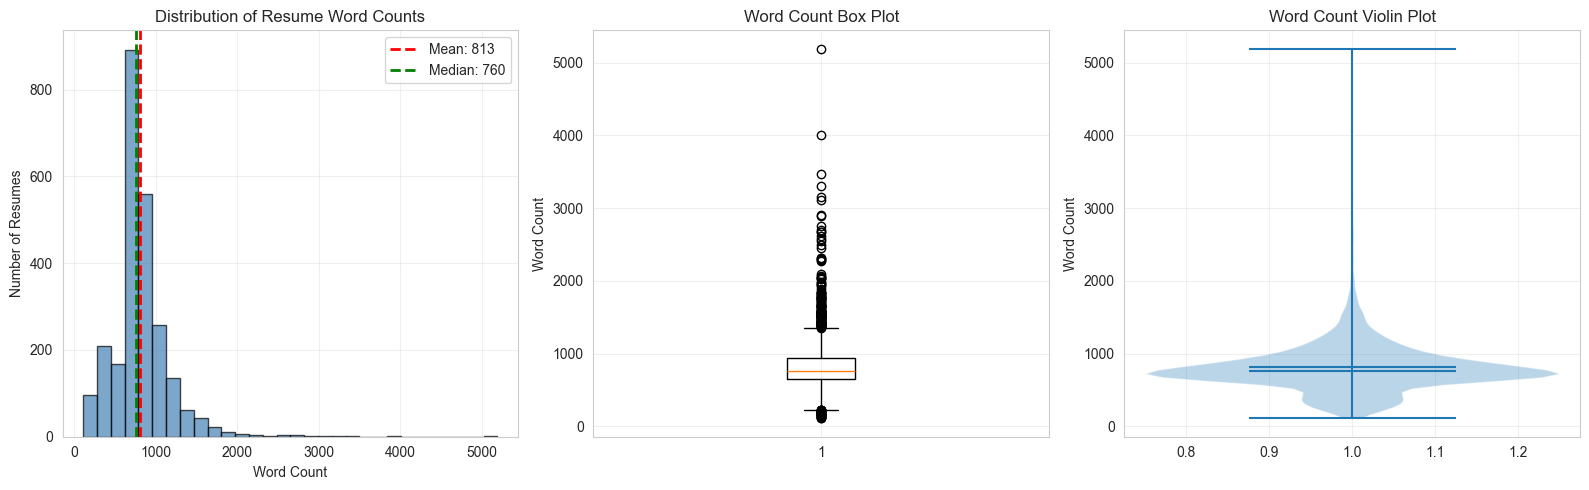

📊 Most resumes are between 652 and 934 words


In [7]:
# CELL 5: Word Count Distribution
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Histogram
axes[0].hist(df['word_count'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["word_count"].mean():.0f}')
axes[0].axvline(df['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["word_count"].median():.0f}')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Number of Resumes')
axes[0].set_title('Distribution of Resume Word Counts')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['word_count'], vert=True)
axes[1].set_ylabel('Word Count')
axes[1].set_title('Word Count Box Plot')
axes[1].grid(alpha=0.3)

# Violin plot
axes[2].violinplot(df['word_count'], vert=True, showmeans=True, showmedians=True)
axes[2].set_ylabel('Word Count')
axes[2].set_title('Word Count Violin Plot')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Most resumes are between {df['word_count'].quantile(0.25):.0f} and {df['word_count'].quantile(0.75):.0f} words")

CATEGORIES ANALYSIS

Total unique categories: 24

Top 15 Categories:
category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
ADVOCATE                  118
FINANCE                   118
ENGINEERING               118
CHEF                      118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
Name: count, dtype: int64


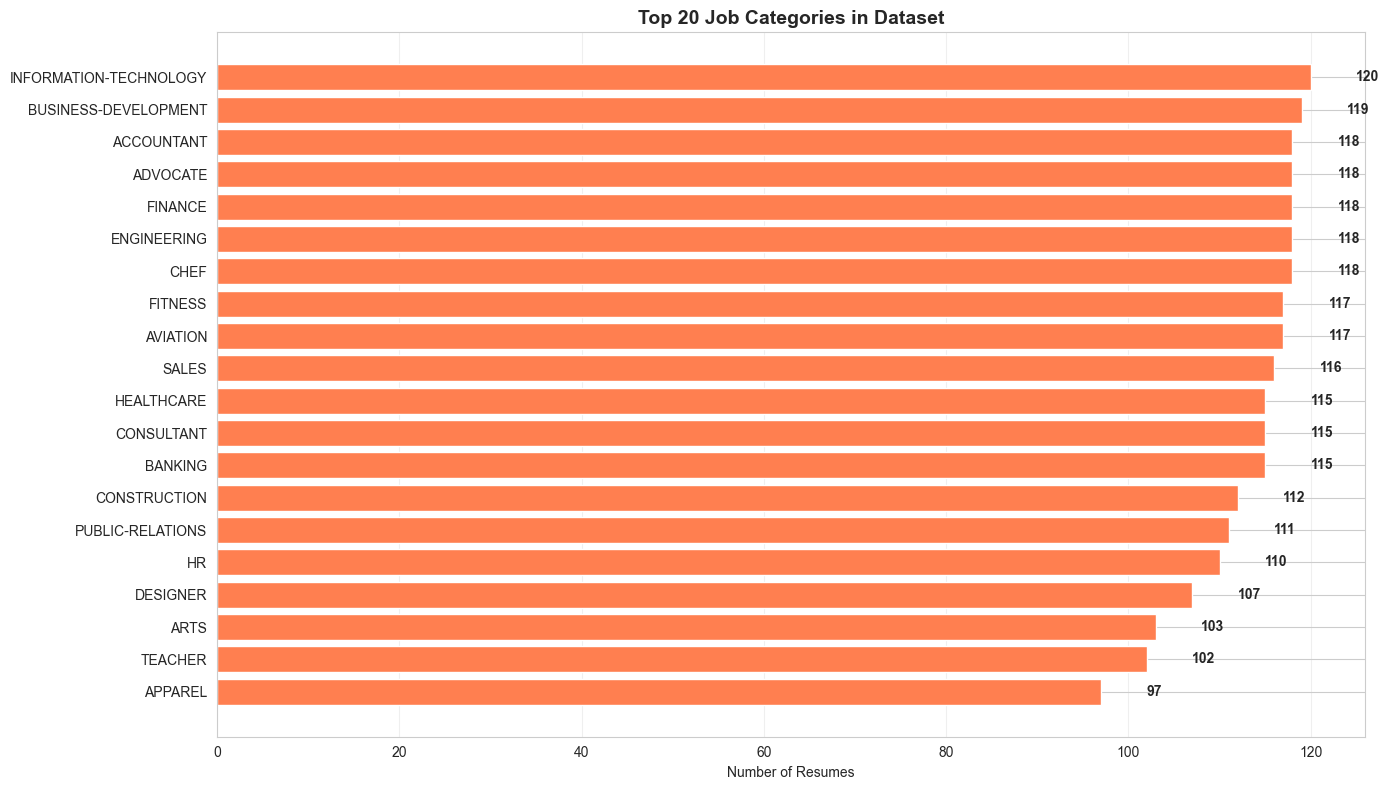

In [8]:
# CELL 6: Categories Analysis
# ============================================================
category_counts = df['category'].value_counts()

print("="*60)
print("CATEGORIES ANALYSIS")
print("="*60)
print(f"\nTotal unique categories: {len(category_counts)}")
print(f"\nTop 15 Categories:")
print(category_counts.head(15))

# Visualize categories
plt.figure(figsize=(14, 8))
top_categories = category_counts.head(20)
plt.barh(range(len(top_categories)), top_categories.values, color='coral')
plt.yticks(range(len(top_categories)), top_categories.index)
plt.xlabel('Number of Resumes')
plt.title('Top 20 Job Categories in Dataset', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(top_categories.values):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

SKILLS ANALYSIS

Total unique skills tracked: 13
Total skill mentions: 2509

Top 20 Most Common Skills:
 1. excel               : 1616 ( 65.1%)
 2. aws                 :  302 ( 12.2%)
 3. sql                 :  191 (  7.7%)
 4. data analysis       :  126 (  5.1%)
 5. java                :   98 (  3.9%)
 6. javascript          :   56 (  2.3%)
 7. python              :   40 (  1.6%)
 8. react               :   35 (  1.4%)
 9. node                :   26 (  1.0%)
10. machine learning    :   12 (  0.5%)
11. tensorflow          :    3 (  0.1%)
12. docker              :    3 (  0.1%)
13. deep learning       :    1 (  0.0%)


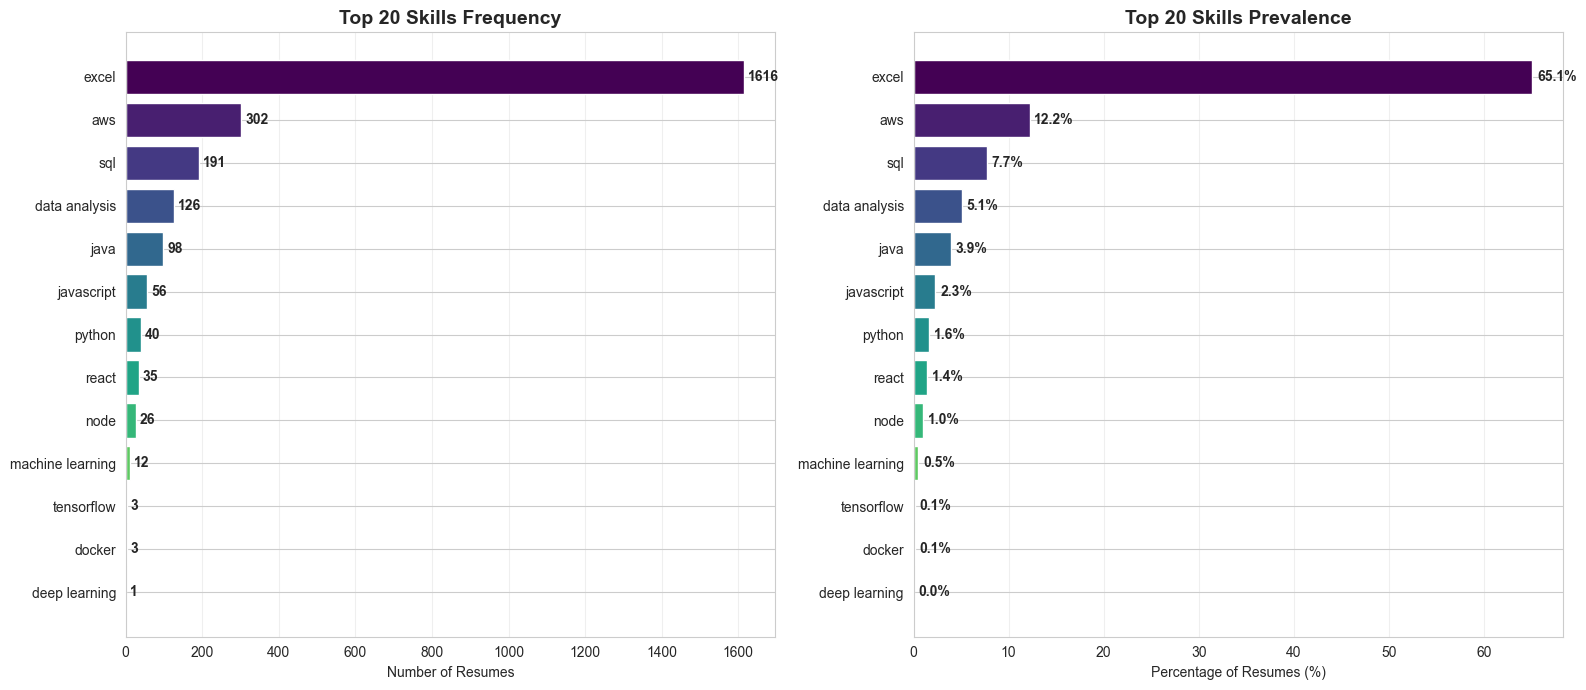

In [9]:
# CELL 7: Skills Analysis
# ============================================================
# Extract all skills
all_skills = []
for skills_list in df['skills']:
    all_skills.extend(skills_list)

skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(20)

print("="*60)
print("SKILLS ANALYSIS")
print("="*60)
print(f"\nTotal unique skills tracked: {len(skill_counts)}")
print(f"Total skill mentions: {len(all_skills)}")
print(f"\nTop 20 Most Common Skills:")
for i, (skill, count) in enumerate(top_skills, 1):
    print(f"{i:2d}. {skill:20s}: {count:4d} ({count/len(df)*100:5.1f}%)")

# Visualize skills
if top_skills:
    skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])
    skills_df['Percentage'] = (skills_df['Count'] / len(df) * 100).round(1)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Bar chart
    colors = plt.cm.viridis(np.linspace(0, 1, len(skills_df)))
    axes[0].barh(skills_df['Skill'], skills_df['Count'], color=colors)
    axes[0].set_xlabel('Number of Resumes')
    axes[0].set_title('Top 20 Skills Frequency', fontsize=14, fontweight='bold')
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)
    
    for i, (skill, count) in enumerate(zip(skills_df['Skill'], skills_df['Count'])):
        axes[0].text(count + 10, i, str(count), va='center', fontweight='bold')
    
    # Percentage chart
    axes[1].barh(skills_df['Skill'], skills_df['Percentage'], color=colors)
    axes[1].set_xlabel('Percentage of Resumes (%)')
    axes[1].set_title('Top 20 Skills Prevalence', fontsize=14, fontweight='bold')
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)
    
    for i, (skill, pct) in enumerate(zip(skills_df['Skill'], skills_df['Percentage'])):
        axes[1].text(pct + 0.5, i, f'{pct}%', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

SKILLS PER RESUME STATISTICS
Average skills per resume: 1.01
Median skills per resume: 1
Min skills: 0
Max skills: 8
Std deviation: 0.89


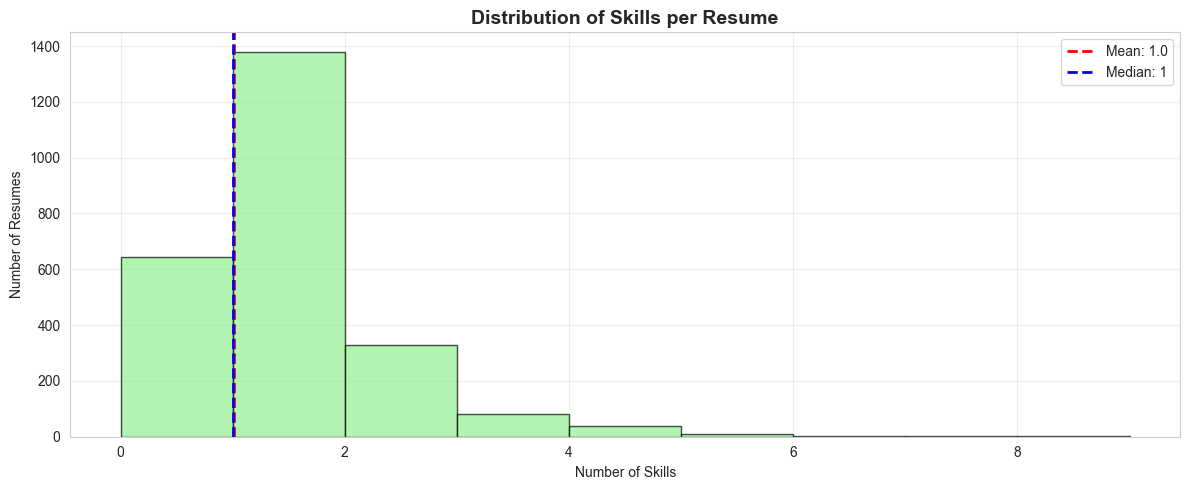

In [10]:
# CELL 8: Skills per Resume
# ============================================================
df['skill_count'] = df['skills'].apply(len)

print("="*60)
print("SKILLS PER RESUME STATISTICS")
print("="*60)
print(f"Average skills per resume: {df['skill_count'].mean():.2f}")
print(f"Median skills per resume: {df['skill_count'].median():.0f}")
print(f"Min skills: {df['skill_count'].min()}")
print(f"Max skills: {df['skill_count'].max()}")
print(f"Std deviation: {df['skill_count'].std():.2f}")

# Distribution
plt.figure(figsize=(12, 5))
plt.hist(df['skill_count'], bins=range(0, df['skill_count'].max()+2), 
         color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(df['skill_count'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {df["skill_count"].mean():.1f}')
plt.axvline(df['skill_count'].median(), color='blue', linestyle='--', 
            linewidth=2, label=f'Median: {df["skill_count"].median():.0f}')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Resumes')
plt.title('Distribution of Skills per Resume', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

CORRELATION ANALYSIS

Correlation between word count and skills: 0.213


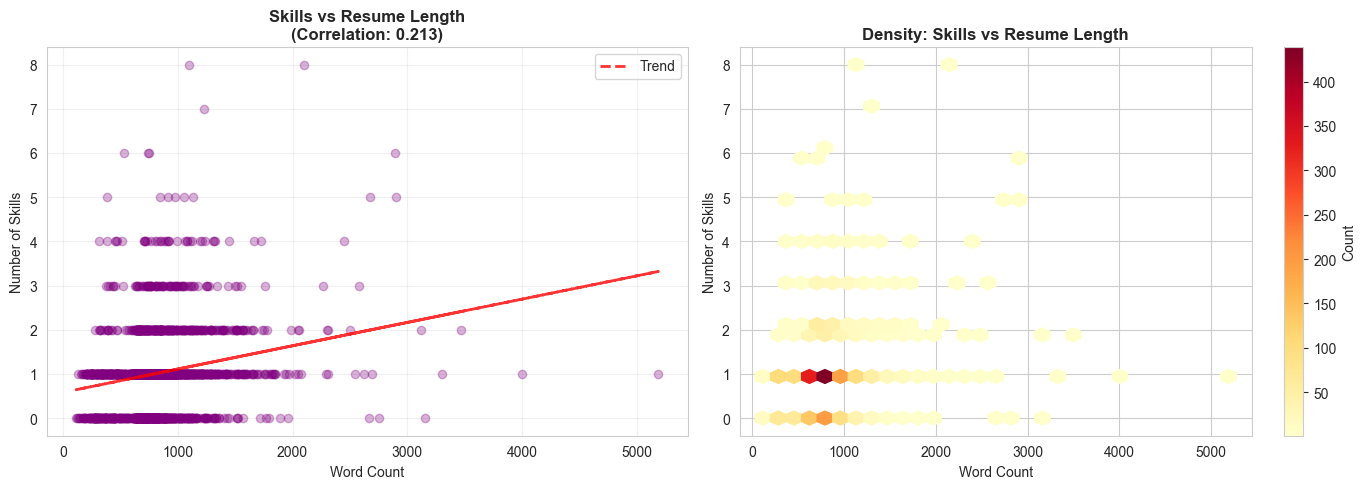

In [11]:
# CELL 9: Correlation Analysis
# ============================================================
print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Skills vs Word Count
correlation = df['word_count'].corr(df['skill_count'])
print(f"\nCorrelation between word count and skills: {correlation:.3f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(df['word_count'], df['skill_count'], alpha=0.3, color='purple')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Number of Skills')
axes[0].set_title(f'Skills vs Resume Length\n(Correlation: {correlation:.3f})', fontweight='bold')
axes[0].grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['word_count'], df['skill_count'], 1)
p = np.poly1d(z)
axes[0].plot(df['word_count'], p(df['word_count']), "r--", alpha=0.8, linewidth=2, label='Trend')
axes[0].legend()

# Hexbin plot (better for large datasets)
axes[1].hexbin(df['word_count'], df['skill_count'], gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Number of Skills')
axes[1].set_title('Density: Skills vs Resume Length', fontweight='bold')
plt.colorbar(axes[1].collections[0], ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

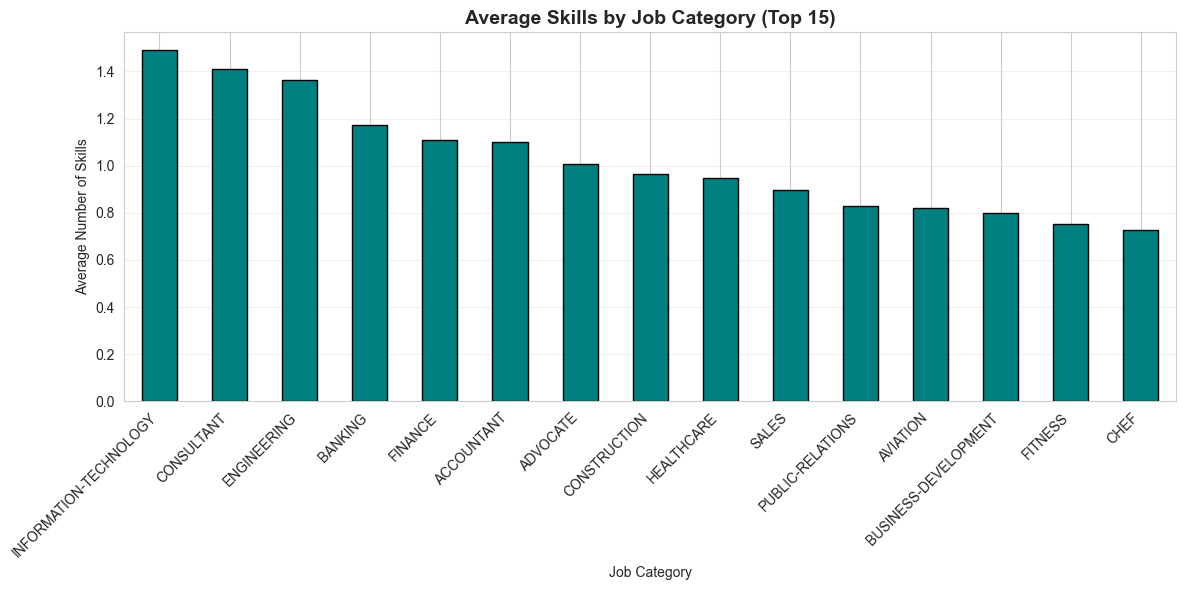


Top 5 Categories by Average Skills:
category
INFORMATION-TECHNOLOGY    1.491667
CONSULTANT                1.408696
ENGINEERING               1.364407
BANKING                   1.173913
FINANCE                   1.110169
Name: skill_count, dtype: float64


In [12]:
# CELL 10: Category vs Skills Analysis
# ============================================================
# Average skills by category (top 15 categories)
top_categories_list = df['category'].value_counts().head(15).index
df_top_cat = df[df['category'].isin(top_categories_list)]

category_skill_avg = df_top_cat.groupby('category')['skill_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_skill_avg.plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Job Category')
plt.ylabel('Average Number of Skills')
plt.title('Average Skills by Job Category (Top 15)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 Categories by Average Skills:")
print(category_skill_avg.head())

In [13]:
# CELL 11: Sample Resume Inspection
# ============================================================
print("="*60)
print("SAMPLE RESUME EXAMPLES")
print("="*60)

# Show 3 random resumes
for i, idx in enumerate(df.sample(3).index, 1):
    resume = df.iloc[idx]
    print(f"\n--- Sample {i} ---")
    print(f"Filename: {resume['filename']}")
    print(f"Category: {resume['category']}")
    print(f"Word Count: {resume['word_count']}")
    print(f"Skills Found ({len(resume['skills'])}): {', '.join(resume['skills']) if resume['skills'] else 'None'}")
    print(f"Email: {resume.get('email', 'Not found')}")
    print(f"Phone: {resume.get('phone', 'Not found')}")
    print(f"\nFirst 200 chars of text:")
    print(resume['cleaned_text'][:200] + "...")
    print("-" * 60)


SAMPLE RESUME EXAMPLES

--- Sample 1 ---
Filename: 28831378.pdf
Category: ENGINEERING
Word Count: 715
Skills Found (0): None
Email: None
Phone: None

First 200 chars of text:
ENGINEERING TECHNICIAN Summary Work as engineering technician on fault isolation area saving medical devices from electrical failures that could be reworked at site depend the electrical failures. Del...
------------------------------------------------------------

--- Sample 2 ---
Filename: 57667857.pdf
Category: HR
Word Count: 1561
Skills Found (2): aws, excel
Email: None
Phone: None

First 200 chars of text:
HR CONSULTANT Summary Detail-oriented 25 years human resources professional who excels under tight deadlines, while anticipating and averting potential problems by proactively streamlining processes t...
------------------------------------------------------------

--- Sample 3 ---
Filename: 25930778.pdf
Category: ENGINEERING
Word Count: 277
Skills Found (0): None
Email: None
Phone: None

First 200 chars of

DATA QUALITY REPORT

Potential Issues:
  Very short (<100 words)       :    0 (  0.0%)
  Very long (>2000 words)       :   28 (  1.1%)
  No skills detected            :  644 ( 25.9%)
  No email                      : 2464 ( 99.2%)
  No phone                      : 2404 ( 96.8%)
  No email AND no phone         : 2400 ( 96.7%)


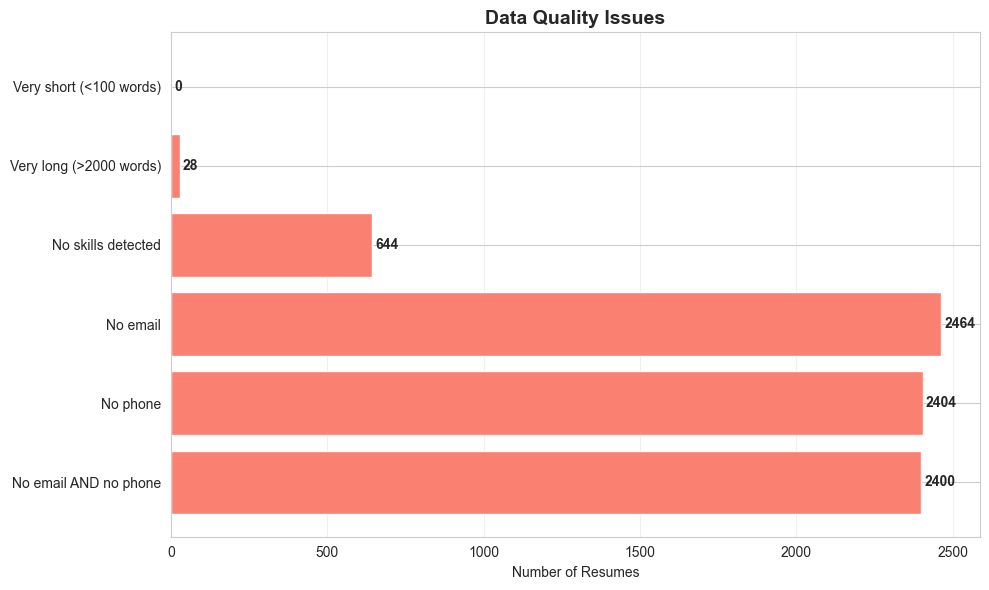

In [14]:
# CELL 12: Data Quality Report
# ============================================================
print("="*60)
print("DATA QUALITY REPORT")
print("="*60)

quality_issues = {
    'Very short (<100 words)': (df['word_count'] < 100).sum(),
    'Very long (>2000 words)': (df['word_count'] > 2000).sum(),
    'No skills detected': (df['skill_count'] == 0).sum(),
    'No email': df['email'].isna().sum(),
    'No phone': df['phone'].isna().sum(),
    'No email AND no phone': ((df['email'].isna()) & (df['phone'].isna())).sum(),
}

print("\nPotential Issues:")
for issue, count in quality_issues.items():
    pct = count/len(df)*100
    print(f"  {issue:30s}: {count:4d} ({pct:5.1f}%)")

# Visualize data quality
plt.figure(figsize=(10, 6))
issues_df = pd.DataFrame(list(quality_issues.items()), columns=['Issue', 'Count'])
plt.barh(issues_df['Issue'], issues_df['Count'], color='salmon')
plt.xlabel('Number of Resumes')
plt.title('Data Quality Issues', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(issues_df['Count']):
    plt.text(v + 10, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [17]:
# ============================================================
# CELL 13: Summary Statistics Export
# ============================================================
summary_stats = {
    'dataset': {
        'total_resumes': int(len(df)),
        'date_analyzed': str(pd.Timestamp.now()),
    },
    'word_counts': {
        'mean': float(df['word_count'].mean()),
        'median': float(df['word_count'].median()),
        'min': int(df['word_count'].min()),
        'max': int(df['word_count'].max()),
        'std': float(df['word_count'].std()),
    },
    'skills': {
        'avg_per_resume': float(df['skill_count'].mean()),
        'total_unique': int(len(skill_counts)),
        'top_10': {str(k): int(v) for k, v in skill_counts.most_common(10)},
    },
    'categories': {
        'total_unique': int(len(category_counts)),
        'top_10': {str(k): int(v) for k, v in category_counts.head(10).items()},
    },
    'contact_info': {
        'emails_found': int(df['email'].notna().sum()),
        'phones_found': int(df['phone'].notna().sum()),
    }
}

# Save summary
summary_path = Path("C:/Users/sonu/resume-screening-ai/data/processed/eda_summary.json")

with open(summary_path, 'w', encoding='utf-8') as f:
    json.dump(summary_stats, f, indent=2)

print(f"✓ Summary statistics saved to: {summary_path}")
print("\nSummary Preview:")
print(json.dumps(summary_stats, indent=2)[:500] + "...")

✓ Summary statistics saved to: C:\Users\sonu\resume-screening-ai\data\processed\eda_summary.json

Summary Preview:
{
  "dataset": {
    "total_resumes": 2483,
    "date_analyzed": "2025-12-24 13:10:25.887646"
  },
  "word_counts": {
    "mean": 812.745871929118,
    "median": 760.0,
    "min": 113,
    "max": 5190,
    "std": 361.88117072667063
  },
  "skills": {
    "avg_per_resume": 1.0104712041884816,
    "total_unique": 13,
    "top_10": {
      "excel": 1616,
      "aws": 302,
      "sql": 191,
      "data analysis": 126,
      "java": 98,
      "javascript": 56,
      "python": 40,
      "react": 35,
 ...


In [18]:
# CELL 14: Key Insights
# ============================================================
print("="*60)
print("KEY INSIGHTS")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"  • Successfully parsed {len(df):,} resumes across {len(category_counts)} job categories")
print(f"  • Average resume length: {df['word_count'].mean():.0f} words")
print(f"  • Most resumes are {df['word_count'].quantile(0.25):.0f}-{df['word_count'].quantile(0.75):.0f} words (IQR)")

print(f"\n🎯 TOP CATEGORIES:")
for i, (cat, count) in enumerate(category_counts.head(5).items(), 1):
    print(f"  {i}. {cat}: {count:,} resumes ({count/len(df)*100:.1f}%)")

print(f"\n💼 TOP SKILLS:")
for i, (skill, count) in enumerate(top_skills[:5], 1):
    print(f"  {i}. {skill}: {count:,} resumes ({count/len(df)*100:.1f}%)")

print(f"\n📈 SKILL INSIGHTS:")
print(f"  • Average {df['skill_count'].mean():.1f} tracked skills per resume")
print(f"  • {correlation:.2f} correlation between resume length and skill count")
print(f"  • {(df['skill_count'] == 0).sum()} resumes have no detected skills (needs better extraction)")

print(f"\n✉️ CONTACT INFO:")
print(f"  • {df['email'].notna().sum()/len(df)*100:.1f}% have email addresses")
print(f"  • {df['phone'].notna().sum()/len(df)*100:.1f}% have phone numbers")

print(f"\n⚠️ DATA QUALITY:")
print(f"  • {quality_issues['Very short (<100 words)']} very short resumes may need review")
print(f"  • {quality_issues['No skills detected']} resumes with no skills detected")

print("\n" + "="*60)
print("✓ EDA COMPLETE! Ready for ML model development.")
print("="*60)

KEY INSIGHTS

📊 DATASET OVERVIEW:
  • Successfully parsed 2,483 resumes across 24 job categories
  • Average resume length: 813 words
  • Most resumes are 652-934 words (IQR)

🎯 TOP CATEGORIES:
  1. INFORMATION-TECHNOLOGY: 120 resumes (4.8%)
  2. BUSINESS-DEVELOPMENT: 119 resumes (4.8%)
  3. ACCOUNTANT: 118 resumes (4.8%)
  4. ADVOCATE: 118 resumes (4.8%)
  5. FINANCE: 118 resumes (4.8%)

💼 TOP SKILLS:
  1. excel: 1,616 resumes (65.1%)
  2. aws: 302 resumes (12.2%)
  3. sql: 191 resumes (7.7%)
  4. data analysis: 126 resumes (5.1%)
  5. java: 98 resumes (3.9%)

📈 SKILL INSIGHTS:
  • Average 1.0 tracked skills per resume
  • 0.21 correlation between resume length and skill count
  • 644 resumes have no detected skills (needs better extraction)

✉️ CONTACT INFO:
  • 0.8% have email addresses
  • 3.2% have phone numbers

⚠️ DATA QUALITY:
  • 0 very short resumes may need review
  • 644 resumes with no skills detected

✓ EDA COMPLETE! Ready for ML model development.
